# 范围歧义检测分析

本notebook专门针对用户故事中的**范围歧义**进行检测和分析。

## 范围歧义定义
范围歧义是指用户故事中功能的边界、适用条件、数据范围等不明确或存在多种解释。常见情况包括：
- 功能边界不明确
- 适用条件模糊（"某些用户"、"特定情况"）
- 数据范围不清晰（"大量数据"、"小文件"）
- 系统边界和依赖关系不明

In [ ]:
from ambiguity_detection_utils import AmbiguityDetector

# 创建范围歧义检测器
detector = AmbiguityDetector("scope")

# 加载并准备数据
file_path = r"data/User Story Ambiguity Dataset_A Comprehensive Research Resource/Cornelius_2025_user_story_ambiguity_dataset.xlsx"
df_test = detector.load_and_prepare_data(file_path, create_balanced=True)

print(f"测试数据集: {len(df_test)} 个用户故事")

Scope歧义统计:
  有scope歧义: 1301 (10.1%)
  无scope歧义: 11546 (89.9%)
平衡测试集: 2602 个用户故事
  HasAmbiguity=True: 1301 (50.0%)
  HasAmbiguity=False: 1301 (50.0%)
测试数据集: 100 个用户故事


In [2]:
# 运行评估
sample_size = detector.get_recommended_sample_size()

results = detector.run_evaluation(
    df_test, 
    sample_size=sample_size,
    prompt_generator=detector.generate_prompt
)

=== Scope歧义检测评估 ===
测试数据集: 100 个用户故事
Processing model gpt-3.5-turbo...
  Processed 10/40 samples
  Processed 20/40 samples
  Processed 30/40 samples
  Processed 40/40 samples
  Scope Ambiguity Detection - Precision: 0.425, Recall: 1.000, F1: 0.596
Processing model deepseek-chat...
API call failed (deepseek-chat): Connection error.
  Processed 10/40 samples
API call failed (deepseek-chat): Connection error.
  Processed 20/40 samples
  Processed 30/40 samples
API call failed (deepseek-chat): Connection error.
  Processed 40/40 samples
  Scope Ambiguity Detection - Precision: 0.425, Recall: 1.000, F1: 0.596


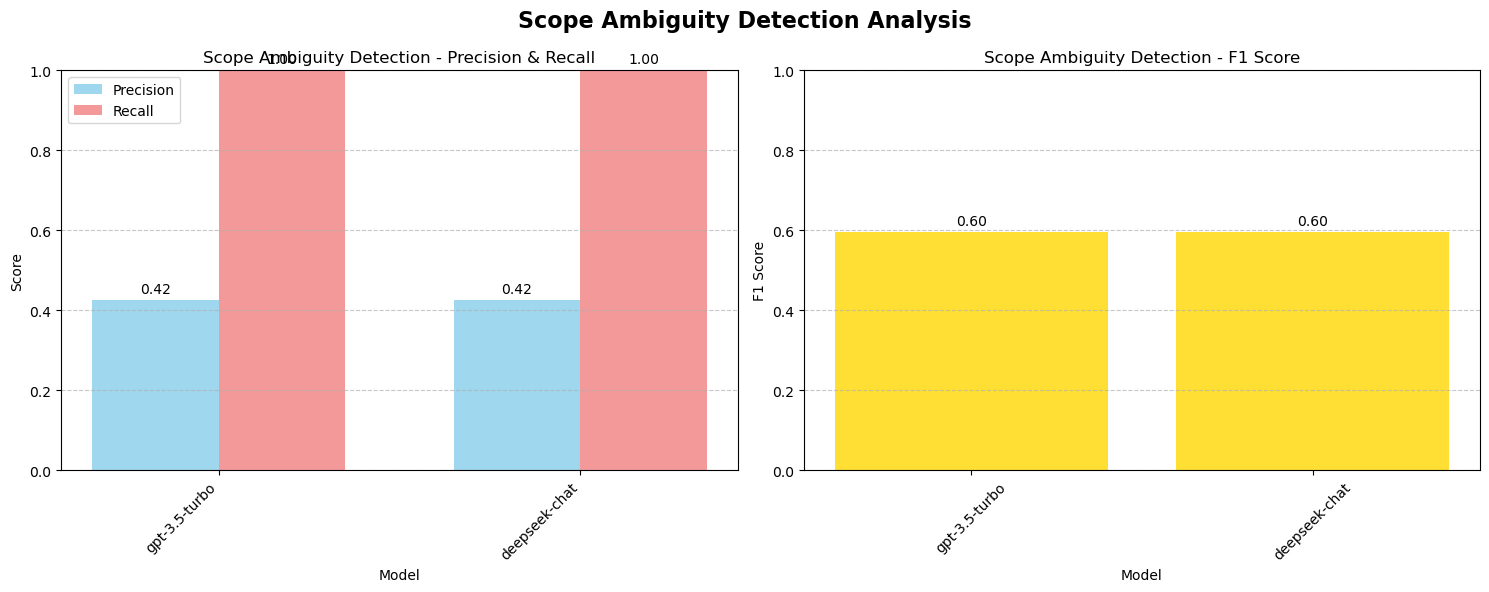

结果已保存到 scope_ambiguity_evaluation_results.json

=== Scope歧义检测评估总结 ===

Model: gpt-3.5-turbo
  Precision: 0.425
  Recall: 1.000
  F1 Score: 0.596

Model: deepseek-chat
  Precision: 0.425
  Recall: 1.000
  F1 Score: 0.596


In [3]:
# 创建可视化和保存结果
detector.create_visualization(results, save_prefix="scope")
detector.save_results(results, "scope_ambiguity_evaluation_results.json")
detector.print_summary(results)

In [4]:
# 错误分析
from ambiguity_detection_utils import analyze_errors
analyze_errors(results, "scope", num_examples=3)


=== Scope歧义错误分析 ===

分析模型: gpt-3.5-turbo (F1: 0.596)

误报 (False Positives): 23 个
漏报 (False Negatives): 0 个

误报示例 (模型认为有歧义，实际无歧义):

1. 用户故事: As a loan officer, I would like to apply for loan to save time
   模型识别的歧义部分: What type of loan? What is the application process? What information is required in the application?
   模型推理: unknown

2. 用户故事: As a doctor, I want to update system so that I can reduce errors
   模型识别的歧义部分: Update system
   模型推理: unknown

3. 用户故事: As a account holder, I would like to view account balance to track spending
   模型识别的歧义部分: view account balance
   模型推理: unknown

漏报示例 (实际有歧义，模型未检测到):
